                           files   iteration  pi_estimate  obtained
3    thread_32_iter_31250000.out    31250000     3.141593  0.041371
1    thread_32_iter_62500000.out    62500000     3.141593  0.080865
4   thread_32_iter_125000000.out   125000000     3.141593  0.163087
2   thread_32_iter_250000000.out   250000000     3.141593  0.305266
5   thread_32_iter_500000000.out   500000000     3.141593  0.594098
6  thread_32_iter_1000000000.out  1000000000     3.141593  1.180940
0  thread_32_iter_2000000000.out  2000000000     3.141593  2.345706


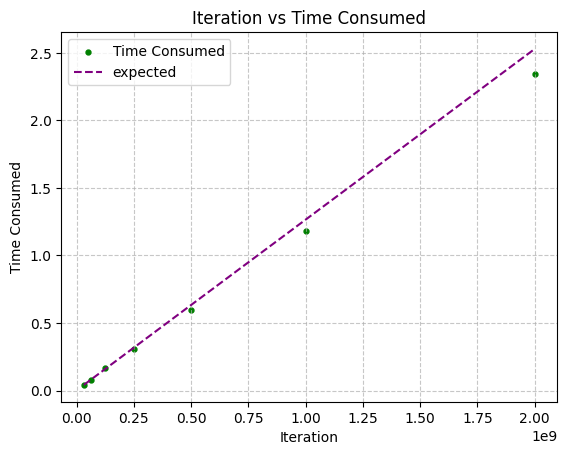

In [8]:
import os
import re
import pandas as pd

def extract_pi_estimate_and_obtained(file_content):
    pi_estimate_match = re.search(r'Pi estimate: (\d+\.\d+)', file_content)
    obtained_match = re.search(r'obtained in (\d+\.\d+) seconds', file_content)

    if pi_estimate_match and obtained_match:
        pi_estimate = float(pi_estimate_match.group(1))
        obtained = float(obtained_match.group(1))
        return pi_estimate, obtained
    else:
        return None, None

def process_iterations_out_files(folder_path, file_name_prefix='thread_32_iter_'):
    iteration_list, pi_estimate_list, obtained_list = [], [], []
    # Get a list of files in a folder starting with 'thread_32_iter_'
    file_list = [f for f in os.listdir(folder_path) if f.startswith(file_name_prefix)]


    for file_name in file_list:
        iteration_match = re.search(file_name_prefix+'(\d+)', file_name)
        if iteration_match:
            iteration = int(iteration_match.group(1))
        else:
            iteration = None

        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'r') as file:
            file_content = file.read()
        pi_estimate, obtained = extract_pi_estimate_and_obtained(file_content)

        if pi_estimate is not None and obtained is not None:
            # print(f"File: {file_name}")
            # print(f"Iteration: {iteration}")
            # print(f"Pi estimate: {pi_estimate}")
            # print(f"Obtained in {obtained} seconds\n")

            iteration_list.append(iteration)
            pi_estimate_list.append(pi_estimate)
            obtained_list.append(obtained)

    data = {'files': file_list,'iteration': iteration_list, 'pi_estimate': pi_estimate_list, 'obtained': obtained_list}
    data_frame = pd.DataFrame(data)
    return data_frame

folder_path = '../output/'
df = process_iterations_out_files(folder_path)
df = df.sort_values(by=['iteration'])
print(df)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['iteration'], df['obtained'], marker='.', label='Time Consumed', color='green', s=50)
# plt.plot(df['iteration'], df['obtained'], marker='*', label='Time Consumed', color='orange', linestyle='-', markersize=8)

fit_params = np.polyfit(df['iteration'][:2], df['obtained'][:2], 1)
fit_line = np.poly1d(fit_params)

plt.plot(df['iteration'], fit_line(df['iteration']), linestyle='--', color='purple', label='expected')

plt.title('Iteration vs Time Consumed')
plt.xlabel('Iteration')
plt.ylabel('Time Consumed')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

    cpus  pi_estimate   obtained   speed_up
0      1     3.141593  36.418847   1.000000
1      8     3.141593   4.691736   7.762339
2     12     3.141593   3.122340  11.663959
3     16     3.141593   2.355710  15.459818
4     20     3.141593   1.933689  18.833870
5     24     3.141593   1.580074  23.048824
6     28     3.141593   1.357894  26.820096
7     32     3.141593   1.191409  30.567880
8     36     3.141593   1.534962  23.726221
9     40     3.141593   1.467548  24.816120
10    44     3.141593   1.405894  25.904405
11    48     3.141593   1.191885  30.555672


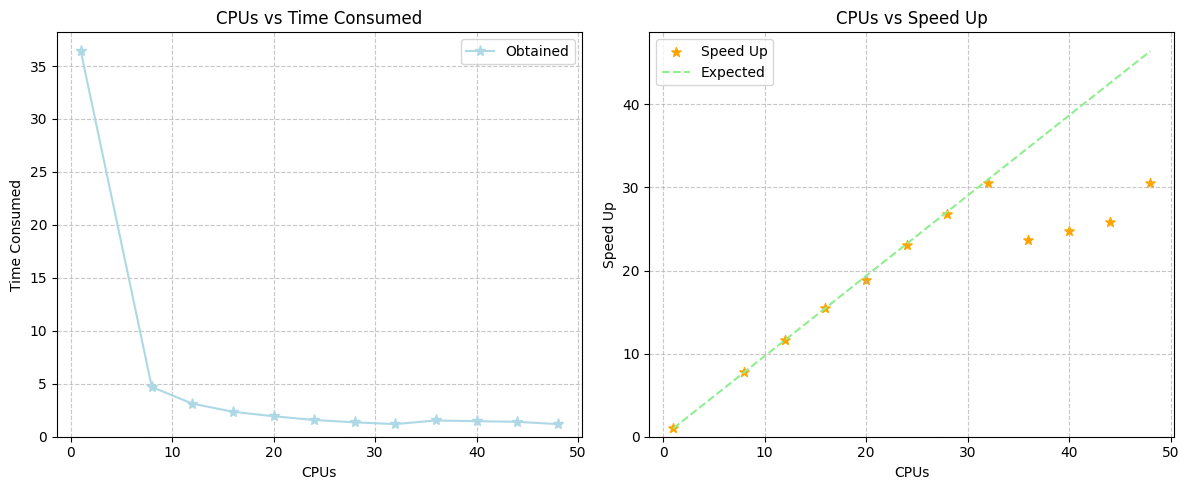

In [6]:
import re
import pandas as pd

def extract_values_from_file(file_path):
    cpu_pattern = re.compile(r'CPUS:  (\d+)')
    pi_estimate_pattern = re.compile(r'Pi estimate: (\S+), obtained in (\S+) seconds')

    cpus_list = []
    pi_estimate_list = []
    obtained_list = []

    with open(file_path, 'r') as file:
        content = file.read()

        cpus_matches = cpu_pattern.findall(content)
        pi_estimate_matches = pi_estimate_pattern.findall(content)

        for cpus in cpus_matches:
            cpus_list.append(int(cpus))

        for pi_estimate, obtained in pi_estimate_matches:
            pi_estimate_list.append(float(pi_estimate))
            obtained_list.append(float(obtained))

    data = {'cpus': cpus_list, 'pi_estimate': pi_estimate_list, 'obtained': obtained_list}
    df = pd.DataFrame(data)
    return cpus_list, pi_estimate_list, obtained_list, df


file_path = '../output/thread_8-48.out'
cpus, pi_estimate, obtained, df = extract_values_from_file(file_path)

# TODO: 修改这个baseline
baseline_time = df['obtained'].iloc[0]  # 目前第一个cpu是8个的
df['speed_up'] = baseline_time / df['obtained']

print(df)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Time Consumed
# axs[0].scatter(df['cpus'], df['obtained'], marker='*', label='Time Consumed', color='orange', s=50)
axs[0].plot(df['cpus'], df['obtained'], marker='*', label='Obtained', color='lightblue', linestyle='-', markersize=8)
# fit_params_1 = np.polyfit(df['cpus'][:2], df['obtained'][:2], 1)
# fit_line_1 = np.poly1d(fit_params_1)
# axs[0].plot(df['cpus'], fit_line_1(df['cpus']), linestyle='--', color='lightgreen', label='Expected')
axs[0].set_title('CPUs vs Time Consumed')
axs[0].set_ylim(bottom=0)
axs[0].set_xlabel('CPUs')
axs[0].set_ylabel('Time Consumed')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend()

# Speed Up
axs[1].scatter(df['cpus'], df['speed_up'], marker='*', label='Speed Up', color='orange', s=50)
# axs[1].plot(df['cpus'], df['obtained'], marker='*', label='Obtained', color='orange', linestyle='-', markersize=8)
fit_params_2 = np.polyfit(df['cpus'][:2], df['speed_up'][:2], 1)
fit_line_2 = np.poly1d(fit_params_2)
axs[1].plot(df['cpus'], fit_line_2(df['cpus']), linestyle='--', color='lightgreen', label='Expected')
axs[1].set_title('CPUs vs Speed Up')
axs[1].set_ylim(bottom=0)
axs[1].set_xlabel('CPUs')
axs[1].set_ylabel('Speed Up')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend()


plt.tight_layout()
plt.show()

    cpus  pi_estimate  obtained   speed_up  effiency
0      8     3.141593  5.163905   7.075489  0.884436
1     12     3.141593  3.466438  10.540260  0.878355
2     16     3.141593  2.608874  14.004953  0.875310
3     20     3.141593  2.097447  17.419823  0.870991
4     24     3.141593  1.757137  20.793570  0.866399
5     28     3.141593  1.514647  24.122551  0.861520
6     32     3.141593  1.333962  27.389960  0.855936
7     36     3.141593  1.797663  20.324809  0.564578
8     40     3.141593  1.729339  21.127809  0.528195
9     44     3.141593  1.693780  21.571373  0.490258
10    48     3.141593  1.680643  21.739989  0.452916
5.163904842105263
3.4664375
2.60887365
2.09744695
1.7571371500000001
1.5146472
1.3339615500000002
1.79766285
1.7293394500000001
1.6937797499999998
1.6806427


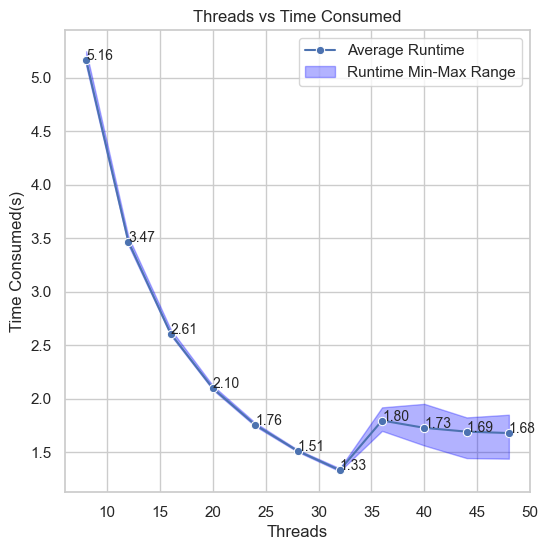

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_, _, _, df_all = extract_values_from_file('../output/pi_thread_thin_20.out')
df_all = df_all.iloc[1:] # ignore the repeated row

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
result_df = df_all.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df_all.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df_all.groupby('cpus').max().reset_index().iloc[start_with:]


# print(df_all)
core_1_time = 36.537154
result_df['speed_up'] = core_1_time / result_df['obtained']
result_df['effiency'] = result_df['speed_up'] / result_df['cpus']
result_df
print(result_df)


sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='obtained', data=result_df, label='Average Runtime', marker='o')
for i in range(len(result_df['obtained'])):
        print(result_df['obtained'][i])
        plt.gca().text(result_df['cpus'][i], result_df['obtained'][i], str("{:.2f}".format(result_df['obtained'][i])),fontsize = 10)
plt.fill_between(result_df['cpus'], df_min['obtained'], df_max['obtained'], color='blue', alpha=0.3, label='Runtime Min-Max Range')


plt.xlabel('Threads')
plt.ylabel('Time Consumed(s)')
plt.title('Threads vs Time Consumed')
plt.legend()
plt.grid(True)

plt.savefig("runtime.svg")
plt.show()

/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_54909/75572429.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, group_df])
/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_54909/75572429.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Runtime Range', alpha=0.3)


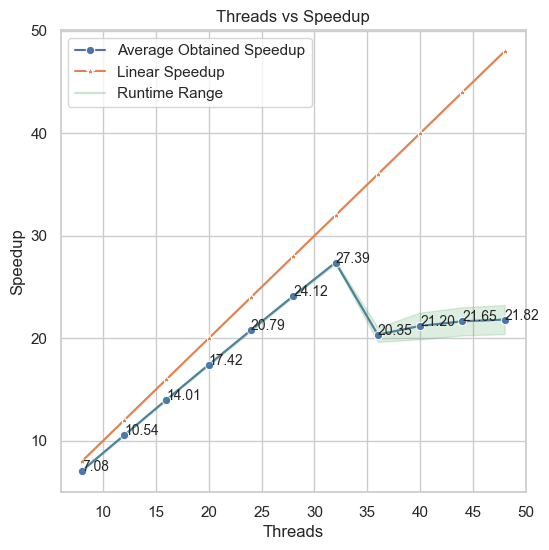

In [156]:
import pandas as pd

_, _, _, df_all = extract_values_from_file('../output/pi_thread_thin_20.out')
df_all = df_all.iloc[1:] # ignore the repeated row


group_size = 13
result_df = pd.DataFrame(columns=df_all.columns)
first_obtained = 36.537154

for i in range(0, len(df_all), group_size):
    group_df = df_all.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['obtained']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='speed_up', data=df_all, label='Average Obtained Speedup', marker='o')
sns.lineplot(x='cpus', y='ideal_speed_up', data=result_df, label='Linear Speedup', marker='*')

for i in range(len(df_all['obtained'])):
        plt.gca().text(df_all['cpus'][i], df_all['speed_up'][i], str("{:.2f}".format(df_all['speed_up'][i])),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Runtime Range', alpha=0.3)



plt.xlabel('Threads')
plt.ylabel('Speedup')
plt.title('Threads vs Speedup')
plt.legend()
plt.grid(True)

plt.savefig("speedup.svg")
plt.show()

/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_54909/3636757398.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, group_df])
/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_54909/3636757398.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='cpus', y='effiency', data=result_df, ci='sd', label='Efficiency Range', alpha=0.3)


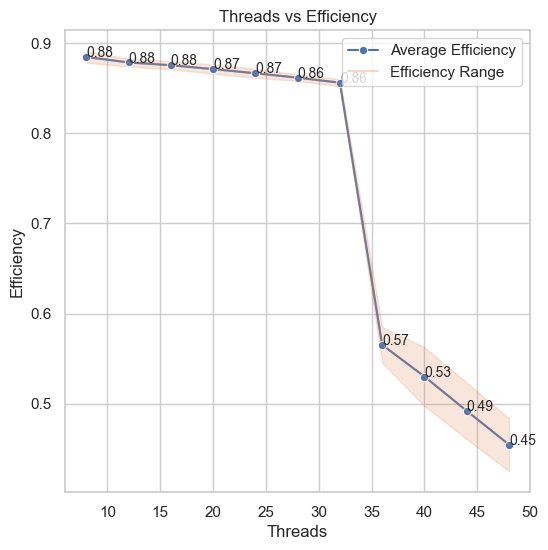

In [158]:
import pandas as pd

_, _, _, df_all = extract_values_from_file('../output/pi_thread_thin_20.out')
df_all = df_all.iloc[1:] # ignore the repeated row


group_size = 13
result_df = pd.DataFrame(columns=df_all.columns)
first_obtained = 36.537154

for i in range(0, len(df_all), group_size):
    group_df = df_all.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['obtained']
    group_df['effiency'] = group_df['speed_up'] / group_df['cpus']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='effiency', data=df_all, label='Average Efficiency', marker='o')
for i in range(len(df_all['obtained'])):
        plt.gca().text(df_all['cpus'][i], df_all['effiency'][i], str("{:.2f}".format(df_all['effiency'][i])),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='effiency', data=result_df, ci='sd', label='Efficiency Range', alpha=0.3)



plt.xlabel('Threads')
plt.ylabel('Efficiency')
plt.title('Threads vs Efficiency')
plt.legend()
plt.grid(True)
plt.savefig("efficiency.svg")
plt.show()

/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_54909/2700482475.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, group_df])
/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_54909/2700482475.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='cpus', y='effiency', data=result_df, ci='sd', label='Efficiency Range', alpha=0.3)


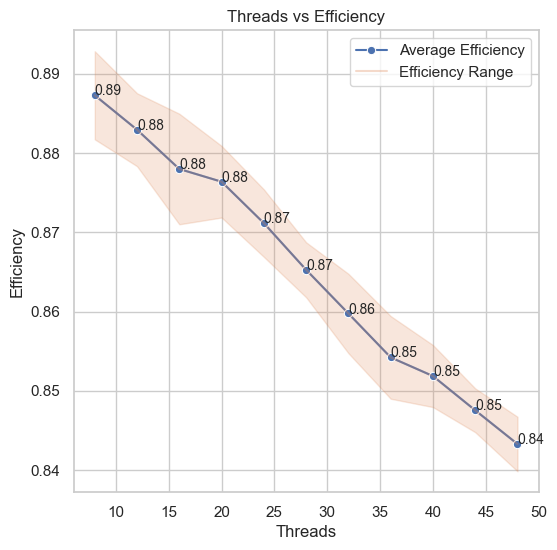

In [157]:
import pandas as pd

_, _, _, df_all = extract_values_from_file('../output/pi_thread_thin_48.out')
df_all = df_all.iloc[1:] # ignore the repeated row


group_size = 13
result_df = pd.DataFrame(columns=df_all.columns)
first_obtained = 36.537154

for i in range(0, len(df_all), group_size):
    group_df = df_all.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['obtained']
    group_df['effiency'] = group_df['speed_up'] / group_df['cpus']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='effiency', data=df_all, label='Average Efficiency', marker='o')
for i in range(len(df_all['obtained'])):
        plt.gca().text(df_all['cpus'][i], df_all['effiency'][i], str("{:.2f}".format(df_all['effiency'][i])),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='effiency', data=result_df, ci='sd', label='Efficiency Range', alpha=0.3)



plt.xlabel('Threads')
plt.ylabel('Efficiency')
plt.title('Threads vs Efficiency')
plt.legend()
plt.grid(True)
plt.savefig("efficiency-48.svg")
plt.show()

In [75]:
import re
import pandas as pd

def workload_extract_values_from_file(file_path):
    iteration_pattern = re.compile(r'Iteration: (\d+)')
    pi_estimate_pattern = re.compile(r'Pi estimate: (\S+), obtained in (\S+) seconds')

    iteration_list = []
    pi_estimate_list = []
    obtained_list = []

    with open(file_path, 'r') as file:
        content = file.read()

        iteration_matches = iteration_pattern.findall(content)
        pi_estimate_matches = pi_estimate_pattern.findall(content)

        for iteration in iteration_matches:
            iteration_list.append(int(iteration))

        for pi_estimate, obtained in pi_estimate_matches:
            pi_estimate_list.append(float(pi_estimate))
            obtained_list.append(float(obtained))

    data = { 'iter': iteration_list, 'pi_estimate': pi_estimate_list, 'obtained': obtained_list}
    df = pd.DataFrame(data)
    return iteration_list, pi_estimate_list, obtained_list, df


file_path = '../output/workload_thin_20.out'
iter, pi_estimate, obtained, df = workload_extract_values_from_file(file_path)

print(df)



           iter  pi_estimate  obtained
0      31250000     3.141593  0.074929
1      62500000     3.141593  0.103254
2     125000000     3.141593  0.190566
3     250000000     3.141593  0.356028
4     500000000     3.141593  0.685247
..          ...          ...       ...
135   125000000     3.141593  0.190722
136   250000000     3.141593  0.356656
137   500000000     3.141593  0.685400
138  1000000000     3.141593  1.329416
139  2000000000     3.141593  2.584176

[140 rows x 3 columns]


0.05139873684210526
0.10126435
0.19141425
0.35774055
0.68998465
1.3298527
2.590814


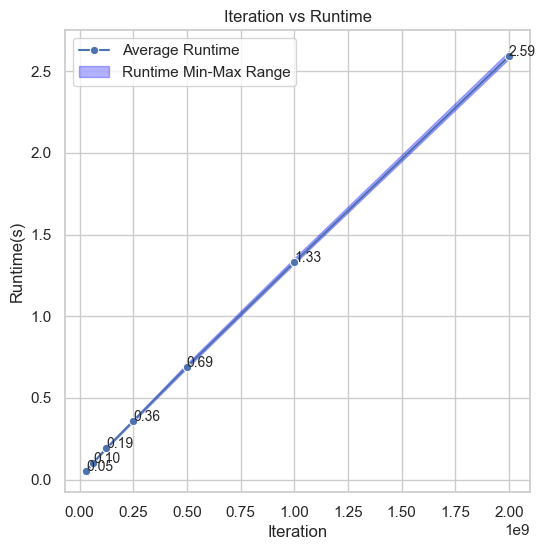

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_, _, _, df_all = workload_extract_values_from_file('../output/workload_thin_20.out')
_, _, _, df_all_1 = workload_extract_values_from_file('../output/workload_thin_20_1.out')


df_all = df_all.iloc[1:] # ignore the repeated row
start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
result_df = df_all.groupby('iter').mean().reset_index().iloc[start_with:]
df_min = df_all.groupby('iter').min().reset_index().iloc[start_with:]
df_max = df_all.groupby('iter').max().reset_index().iloc[start_with:]

result_df['ideal_speed_up'] = result_df['iter']

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))

sns.scatterplot(data=result_df, x='iter', y='obtained')
sns.lineplot(x='iter', y='obtained', data=result_df, label='Average Runtime', marker='o')

for i in range(len(result_df['obtained'])):
        print(result_df['obtained'][i])
        plt.gca().text(result_df['iter'][i], result_df['obtained'][i], str("{:.2f}".format(result_df['obtained'][i])),fontsize = 10)

plt.fill_between(result_df['iter'], df_min['obtained'], df_max['obtained'], color='blue', alpha=0.3, label='Runtime Min-Max Range')


plt.xlabel('Iteration')
plt.ylabel('Runtime(s)')
plt.title('Iteration vs Runtime')
plt.legend()
plt.grid(True)

plt.savefig("workload-runtime.svg")
plt.show()

         iter  pi_estimate  obtained
0    31250000     3.141593  0.051399
1    62500000     3.141593  0.101264
2   125000000     3.141593  0.191414
3   250000000     3.141593  0.357741
4   500000000     3.141593  0.689985
5  1000000000     3.141593  1.329853
6  2000000000     3.141593  2.590814
         iter  pi_estimate   obtained
0    31250000     3.141593   1.351045
1    62500000     3.141593   2.651370
2   125000000     3.141593   5.215204
3   250000000     3.141593  10.300942
4   500000000     3.141593  20.514061
5  1000000000     3.141593  40.810248
6  2000000000     3.141593  81.507072
26.28556166306224
26.18265813331994
27.245639086058492
28.794448139261025
29.7311848065854
30.68779604581126
31.460024422550486


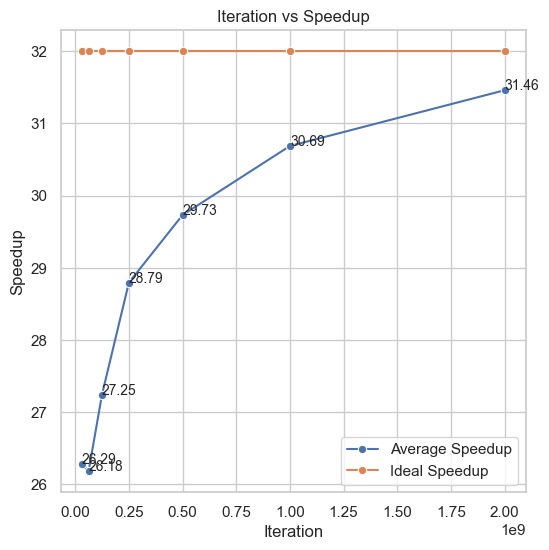

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_, _, _, df_all = workload_extract_values_from_file('../output/workload_thin_20.out')
_, _, _, df_all_1 = workload_extract_values_from_file('../output/workload_thin_20_1.out')


df_all = df_all.iloc[1:] # ignore the repeated row
start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
result_df = df_all.groupby('iter').mean().reset_index().iloc[start_with:]
df_min = df_all.groupby('iter').min().reset_index().iloc[start_with:]
df_max = df_all.groupby('iter').max().reset_index().iloc[start_with:]

df_all_1 = df_all_1.iloc[1:] # ignore the repeated row
start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
result_df_1 = df_all_1.groupby('iter').mean().reset_index().iloc[start_with:]

print(result_df)
print(result_df_1)
result_df['ideal_speed_up'] = result_df['iter']
result_df['speed_up'] = result_df_1['obtained']/result_df['obtained']
result_df['ideal_speed_up'] = 32

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))

sns.scatterplot(data=result_df, x='iter', y='speed_up')
sns.lineplot(x='iter', y='speed_up', data=result_df, label='Average Speedup', marker='o')
sns.lineplot(x='iter', y='ideal_speed_up', data=result_df, label='Ideal Speedup', marker='o')

for i in range(len(result_df['speed_up'])):
        print(result_df['speed_up'][i])
        plt.gca().text(result_df['iter'][i], result_df['speed_up'][i], str("{:.2f}".format(result_df['speed_up'][i])),fontsize = 10)


plt.xlabel('Iteration')
plt.ylabel('Speedup')
plt.title('Iteration vs Speedup')
plt.legend()
plt.grid(True)

plt.savefig("workload-Speedup.svg")
plt.show()